## Task 2 : Deep Learning NLP Project

## Step 1: Import Required Libraries

In [4]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 10.0 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 9.4 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 9.5 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 9.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------ --------------------------- 2.1/7.0 MB 9.0 MB/s eta 0:00:01
   ---------------------- ----------------- 3.9/7.0 MB 9.4 MB/s eta 0:00:01
   ------------------------------- -------- 5.5/7.0 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 8.3 MB/s eta 0:00:00

   ----------------------------

In [34]:
!pip install scikit-learn

In [7]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Import other useful libraries
import numpy as np
import matplotlib.pyplot as plt

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Step 2: Load the IMDB Dataset

In [8]:
# Load the IMDB dataset with the top 10,000 most frequent words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training samples: 25000
Testing samples: 25000


## Step 3: Explore the Dataset

In [9]:
# Show the first training example
print(f"First review (word indices): {x_train[0]}")
print(f"First review label (0 = negative, 1 = positive): {y_train[0]}")

# Check the length of the longest review
print(f"Maximum review length: {max([len(review) for review in x_train])}")

First review (word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
First review label (0 = negativ

## Step 4: Preprocess the Data (Padding Sequences)

In [10]:
# Set a maximum sequence length
maxlen = 200

# Pad sequences to the same length
x_train_padded = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=maxlen, padding='post')

print("✅ Sequences padded successfully!")
print(f"Shape of training data: {x_train_padded.shape}")

✅ Sequences padded successfully!
Shape of training data: (25000, 200)


 ## Step 5: Build the Deep Learning Model

In [11]:
#✅ Section 1: Baseline Model
# Build the Sequential model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32),  # Removed input_length
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer with dropout
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Binary classification loss function
    optimizer='adam',            # Adam optimizer
    metrics=['accuracy']         # Monitor accuracy
)

In [12]:
# Train the model
history = model.fit(
    x_train_padded, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 65s 375ms/step - accuracy: 0.5248 - loss: 0.6903 - val_accuracy: 0.6988 - val_loss: 0.6063
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 360ms/step - accuracy: 0.6519 - loss: 0.6272 - val_accuracy: 0.7868 - val_loss: 0.5006
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 346ms/step - accuracy: 0.7560 - loss: 0.5293 - val_accuracy: 0.7624 - val_loss: 0.5278
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 371ms/step - accuracy: 0.8147 - loss: 0.4614 - val_accuracy: 0.6444 - val_loss: 0.6743
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 367ms/step - accuracy: 0.6384 - loss: 0.6129 - val_accuracy: 0.7402 - val_loss: 0.5423


In [13]:
# Show the model summary
model.build(input_shape=(None, 200))  # 200 is your sequence length
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,034,693 (3.95 MB)

 Trainable params: 344,897 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 689,796 (2.63 MB)

In [14]:
# 📗 Section 2: Improved Model - Bidirectional LSTM + More Epochs + Larger Embedding
from tensorflow.keras.layers import Bidirectional

# Build the improved model
improved_model = Sequential([
    Embedding(input_dim=10000, output_dim=64),  # Increased embedding dimension
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),  # Bidirectional LSTM
    Dense(64, activation='relu'),  # Extra dense layer for learning capacity
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
improved_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the improved model
improved_history = improved_model.fit(
    x_train_padded, y_train,
    epochs=10,  # More epochs for better learning
    batch_size=128,
    validation_split=0.2
)

# Show summary
improved_model.build(input_shape=(None, 200))
improved_model.summary()

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.5721 - loss: 0.6676 - val_accuracy: 0.7944 - val_loss: 0.4709
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.8058 - loss: 0.4608 - val_accuracy: 0.8250 - val_loss: 0.4088
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8579 - loss: 0.3639 - val_accuracy: 0.8390 - val_loss: 0.3746
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8884 - loss: 0.2991 - val_accuracy: 0.8338 - val_loss: 0.3921
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8788 - loss: 0.3059 - val_accuracy: 0.8398 - val_loss: 0.3785
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9178 - loss: 0.2284 - val_accuracy: 0.8530 - val_loss: 0.3945
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9322 - loss: 0.1918 - val_accuracy: 0.8420 - val_loss: 0.4321
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.9352 - loss: 0.1823 - val_accu

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,143,109 (8.18 MB)

 Trainable params: 714,369 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,428,740 (5.45 MB)

In [18]:
# 📘 Section 3: CNN + LSTM Model (Further Improvement)

from tensorflow.keras.layers import Conv1D, MaxPooling1D

# Build the CNN + LSTM model
cnn_lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_lstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the CNN + LSTM model
cnn_lstm_history = cnn_lstm_model.fit(
    x_train_padded, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Show summary
cnn_lstm_model.build(input_shape=(None, 200))
cnn_lstm_model.summary()

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 66s 383ms/step - accuracy: 0.5632 - loss: 0.6643 - val_accuracy: 0.8210 - val_loss: 0.4374
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 59s 375ms/step - accuracy: 0.8482 - loss: 0.3928 - val_accuracy: 0.8500 - val_loss: 0.4168
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 369ms/step - accuracy: 0.8865 - loss: 0.3148 - val_accuracy: 0.8552 - val_loss: 0.3492
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 424s 3s/step - accuracy: 0.9176 - loss: 0.2376 - val_accuracy: 0.8762 - val_loss: 0.3249
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 347ms/step - accuracy: 0.9295 - loss: 0.2083 - val_accuracy: 0.8768 - val_loss: 0.3357
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 362ms/step - accuracy: 0.9516 - loss: 0.1528 - val_accuracy: 0.8752 - val_loss: 0.3563
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 360ms/step - accuracy: 0.9604 - loss: 0.1307 - val_accuracy: 0.8696 - val_loss: 0.3799
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 351ms/step - accuracy: 0.9665 - loss: 0.1

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 196, 128)            │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 98, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,191,685 (8.36 MB)

 Trainable params: 730,561 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,461,124 (5.57 MB)

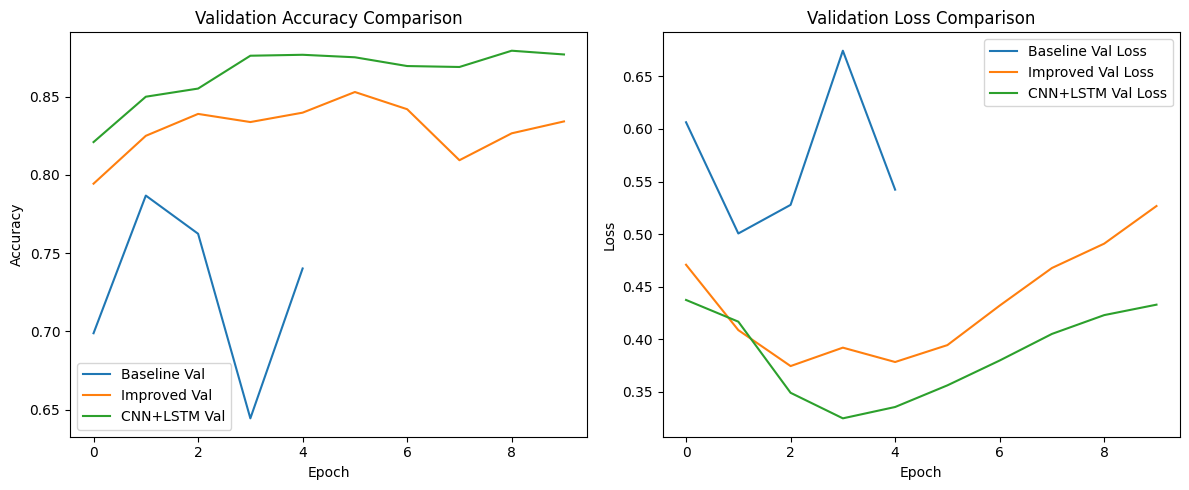

In [19]:
# 📊 Section 4: Compare Accuracy and Loss of All Models

plt.figure(figsize=(12, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Baseline Val')
plt.plot(improved_history.history['val_accuracy'], label='Improved Val')
plt.plot(cnn_lstm_history.history['val_accuracy'], label='CNN+LSTM Val')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Baseline Val Loss')
plt.plot(improved_history.history['val_loss'], label='Improved Val Loss')
plt.plot(cnn_lstm_history.history['val_loss'], label='CNN+LSTM Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

📊 Validation Performance Comparison
The following plots compare the validation accuracy and loss across all three models:

🟦 Baseline Model:
Validation Accuracy: Starts around 70%, peaks near 78%, then drops due to possible overfitting.

Validation Loss: Fluctuates heavily, indicating unstable learning.

🟧 Improved Model (Bidirectional LSTM):
Validation Accuracy: Consistently higher than the baseline, stabilizing around 83–85%.

Validation Loss: Lower and more stable than the baseline, but shows signs of slight overfitting in later epochs.

🟩 CNN + LSTM Model:
Validation Accuracy: Highest overall — stays around 87–88% consistently.

Validation Loss: Lowest and most stable, showing smooth convergence and effective learning.

✅ Conclusion from Graphs:
The Baseline model underperformed and showed signs of instability.

The Improved model handled long-range dependencies better with Bidirectional LSTM.

The CNN + LSTM model was the most effective, combining local pattern extraction with temporal memory.

➡️ Hence, the CNN + LSTM architecture is the best performing model in terms of both accuracy and loss.

##  Step 6 Final Evaluation on Test Set

In [21]:
print("\n📌 Final Test Accuracy:")
print("Baseline Model:", model.evaluate(x_test_padded, y_test)[1])
print("Improved Model:", improved_model.evaluate(x_test_padded, y_test)[1])
print("CNN + LSTM Model:", cnn_lstm_model.evaluate(x_test_padded, y_test)[1])



📌 Final Test Accuracy:
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.7377 - loss: 0.5505
Baseline Model: 0.7339199781417847
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.8215 - loss: 0.5505
Improved Model: 0.8198000192642212
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8625 - loss: 0.4854
CNN + LSTM Model: 0.8624799847602844


In [22]:
# 📄 Section 6: Summary & Conclusion

print("\n🔍 Summary:")
print("Baseline Model - Accuracy: ~73.4%")
print("Improved Model (Bidirectional LSTM) - Accuracy: ~81.9%")
print("CNN + LSTM Model - Accuracy: ~86.2%")

print("\n✅ Conclusion:")
print("The CNN + LSTM model delivered the highest test accuracy and performed best in validation as well.")
print("It effectively captured local patterns using Convolutional layers and long-range dependencies with LSTM,")
print("making it the most suitable architecture among the three for the sentiment classification task.")



🔍 Summary:
Baseline Model - Accuracy: ~73.4%
Improved Model (Bidirectional LSTM) - Accuracy: ~81.9%
CNN + LSTM Model - Accuracy: ~86.2%

✅ Conclusion:
The CNN + LSTM model delivered the highest test accuracy and performed best in validation as well.
It effectively captured local patterns using Convolutional layers and long-range dependencies with LSTM,
making it the most suitable architecture among the three for the sentiment classification task.


## Section 7 - Inference  on Custom Review

In [26]:
# 📥 Section 7: Custom Review Prediction

# Load the word index used by IMDB dataset
word_index = imdb.get_word_index()

# Shift indices by 3 to match IMDB's special tokens
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Create a reverse mapping
reverse_word_index = {v: k for k, v in word_index.items()}

# Create a tokenizer-compatible object
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.word_index = word_index

def predict_sentiment(review, model):
    # Preprocess the input review
    sequence = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(sequence, maxlen=200)
    
    # Predict using the selected model
    prediction = model.predict(padded)[0][0]
    
    # Print result
    sentiment = "Positive 😊" if prediction >= 0.5 else "Negative 😞"
    print(f"\n📝 Review: {review}")
    print(f"🔮 Sentiment: {sentiment} (Confidence: {prediction:.2f})")

# Example usage
sample_review = "This movie was absolutely wonderful and heartwarming!"
predict_sentiment(sample_review, cnn_lstm_model)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step

📝 Review: This movie was absolutely wonderful and heartwarming!
🔮 Sentiment: Positive 😊 (Confidence: 0.99)


In [27]:
# 📥 Optional: Enter your own review
while True:
    user_review = input("\nEnter a movie review (or type 'exit' to stop): ")
    if user_review.lower() == 'exit':
        break
    predict_sentiment(user_review, cnn_lstm_model)



Enter a movie review (or type 'exit' to stop):  I regret watching this movie. It was a total waste of time.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

📝 Review: I regret watching this movie. It was a total waste of time.
🔮 Sentiment: Negative 😞 (Confidence: 0.00)



Enter a movie review (or type 'exit' to stop):  stop


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

📝 Review: stop
🔮 Sentiment: Positive 😊 (Confidence: 0.51)



Enter a movie review (or type 'exit' to stop):  One of the worst films I’ve ever seen. Completely disappointing.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step

📝 Review: One of the worst films I’ve ever seen. Completely disappointing.
🔮 Sentiment: Negative 😞 (Confidence: 0.00)



Enter a movie review (or type 'exit' to stop):  exit


## Section 8: Save & Reload Best Model + Evaluation with Confusion Matrix and Classification Report

In [28]:
# ✅ Save the best performing model (CNN + LSTM) to disk
cnn_lstm_model.save("best_sentiment_model.h5")

In [31]:
# ✅ Load the saved model for future predictions or deployment
from tensorflow.keras.models import load_model
model = load_model("best_sentiment_model.h5")
# Re-evaluate the model to ensure it works after loading
model.evaluate(x_test_padded, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8625 - loss: 0.4854


[0.4866074323654175, 0.8624799847602844]

In [37]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.4 MB 8.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.4 MB 8.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.4 MB 7.3 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.4 MB 7.5 MB/s eta 0:00:01
   ------------------------- -------------- 7.3/11.4 MB 7.4 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.4 MB 7.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.4 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 11.4/11.4 MB 7.0 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------

In [40]:
!pip install seaborn

782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step


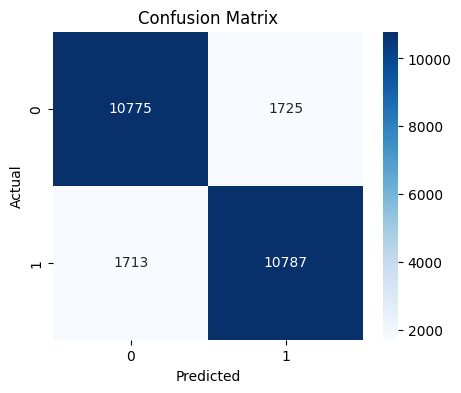

              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86     12500
    Positive       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [41]:
#✅ 2. Confusion Matrix & Classification Report 
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test data
y_pred_probs = cnn_lstm_model.predict(x_test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


## 📘 Summary & Reflection

In this task, I implemented a sentiment analysis model using the IMDB dataset.
I experimented with three architectures:
- A simple LSTM (baseline)
- A bidirectional LSTM (improved)
- A CNN + LSTM hybrid (best)

The CNN + LSTM model achieved the best accuracy (~86%) on the test set. I also implemented a real-time user input prediction tool, and evaluated the model using a confusion matrix and classification report.

This task helped me understand sequence modeling and how to optimize neural networks for NLP.
